Binary semantic segmentation using U-Net
Dataset: https://www.epfl.ch/labs/cvlab/data/data-em/

In [1]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import pandas as pd 
from skimage.io import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
image_directory = '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/'
mask_directory = '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmask/'

In [71]:
SIZE = 256
num_images = 550

In [72]:
em_image_vol = imread('/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/training.tif')[:num_images-385]
em_thresh_vol = imread('/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/training_groundtruth.tif')[:num_images-385]>0
em_slice=em_image_vol[num_images-386]
em_slice_mask=em_thresh_vol[num_images-386]

Load images and masks in order so they match

In [6]:
image_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/*.tif")
print(image_names)

['/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_26_10.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_81_10.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_85_21.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_38_13.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_15_11.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_53_12.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_27_02.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in Tenso

In [7]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_00.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_01.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_02.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_03.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_10.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_11.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/timage/image_0_12.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/I

In [8]:
image_names_subset = image_names[0:num_images]

In [9]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [10]:
image_dataset = np.array(images)
image_dataset
image_dataset = np.expand_dims(image_dataset, axis = 3)

Read masks the same way. 

In [11]:
mask_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/*.tif")
mask_names.sort()
print(mask_names)
mask_names_subset = mask_names[0:num_images]

masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

['/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_00.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_01.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_02.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_03.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_10.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_11.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mitocondria/tmasks/mask_0_12.tif', '/content/drive/MyDrive/Colab Notebooks/Exam: CNN Binary Image Classifier in TensorFlow/Image/Mi

In [12]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (550, 256, 256, 1)
Mask data shape is:  (550, 256, 256, 1)
Max pixel value in image is:  225
Labels in the mask are :  [  0 255]


In [ ]:
#scaler = MinMaxScaler()

In [ ]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [13]:
#Normalize images
image_dataset = image_dataset /255.  #Pixel values will be 0 or 1
mask_dataset = mask_dataset /255.  #Pixel values will be 0 or 1

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


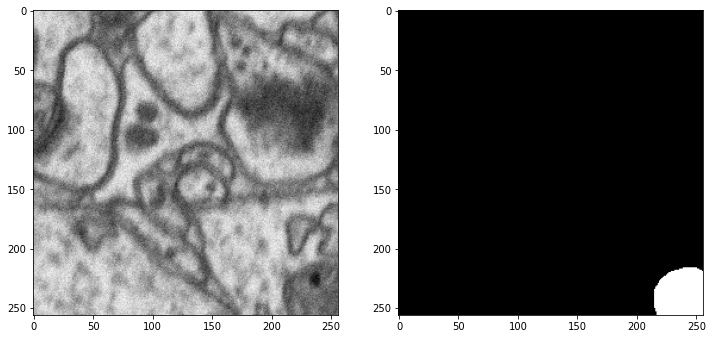

64

In [15]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()
image_number

In [34]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)
    return x



Encoder block: Conv block followed by maxpooling

In [ ]:
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

Decoder block

In [ ]:
def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

Build Unet using the blocks

In [ ]:
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [35]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [36]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [37]:
history = model.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=1, 
                    epochs=75, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


Epoch 1/75
55/55 [==============================] - 48s 703ms/step - loss: 0.1953 - accuracy: 0.9442 - val_loss: 0.4123 - val_accuracy: 0.8604
Epoch 2/75
55/55 [==============================] - 34s 627ms/step - loss: 0.1091 - accuracy: 0.9650 - val_loss: 1.3221 - val_accuracy: 0.4681
Epoch 3/75
55/55 [==============================] - 34s 622ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 11.0568 - val_accuracy: 0.0679
Epoch 4/75
55/55 [==============================] - 35s 635ms/step - loss: 0.0877 - accuracy: 0.9723 - val_loss: 0.2285 - val_accuracy: 0.8865
Epoch 5/75
55/55 [==============================] - 34s 623ms/step - loss: 0.0802 - accuracy: 0.9760 - val_loss: 0.2493 - val_accuracy: 0.8909
Epoch 6/75
55/55 [==============================] - 35s 636ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.2128 - val_accuracy: 0.9471
Epoch 7/75
55/55 [==============================] - 34s 628ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.2306 - val_accuracy: 0.940

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/Exam1_Mitocondria550_b8_e75.hdf5')

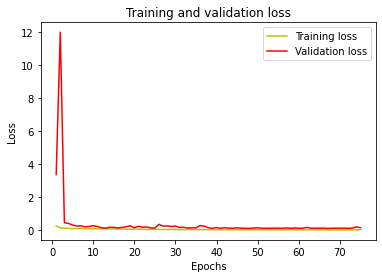

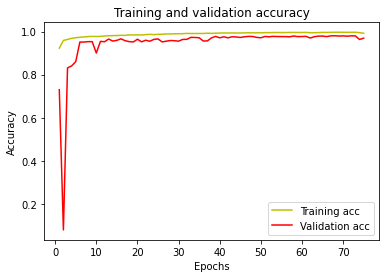

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = em_thresh_vol.ravel()
score_value = 1-em_image_vol.ravel()/255.0 
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

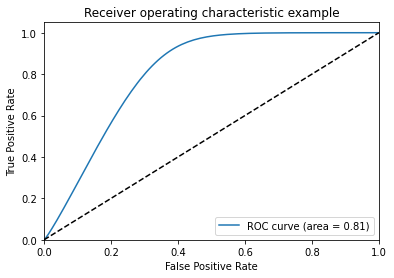

In [74]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

In [18]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/saved_models/Exam1_Mitocondria550_b8_e75.hdf5", compile=False)
        

In [20]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

4/4 [==============================] - 24s 2s/step


In [21]:
from tensorflow.keras.metrics import MeanIoU

In [22]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.7548256


(1, 256, 256, 1)
1/1 [==============================] - 0s 17ms/step
(256, 256)


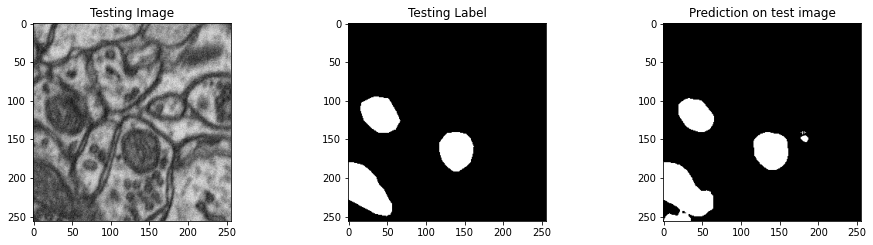

In [33]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()